# Libraries

In [1]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Question a

In [3]:
def generateGraph(num_of_vertices, num_of_edges):
    
    matrix = np.zeros((num_of_vertices,num_of_vertices)).astype(int)

    edge_count = 0
    for i in range(num_of_vertices):
        j = i + 1
        for j in range(num_of_vertices):
            edge_exist = random.randint(0,2)
            if edge_exist > 0 and i != j and edge_count != num_of_edges:
                dist = random.randint(1,10)
                matrix[i,j] = dist
                matrix[j,i] = dist
                edge_count += 1

    return matrix

############# TEST #############
random.seed(10)
print(generateGraph(5, 10))

[[0 8 2 6 0]
 [8 0 3 7 8]
 [2 3 0 1 3]
 [6 7 1 0 0]
 [0 8 3 0 0]]


In [4]:
def priorityQueue(dist_from_source):
    
    num_of_vertices = len(dist_from_source)
    
    queue = {}
    for i in range(num_of_vertices):
        vertice = i + 1
        dist = dist_from_source[i]
        queue[vertice] = dist
        
    
    return queue

############# TEST #############
print(priorityQueue([5,4,3,2,1]))

{1: 5, 2: 4, 3: 3, 4: 2, 5: 1}


In [5]:
def adjacent(matrix, vertice):
    
    adjacents = []
    
    for i in range(len(matrix)):
        if matrix[vertice - 1][i] != 0 and i != vertice - 1:
            adjacents.append(i+1)
            
    return adjacents

############# TEST #############
random.seed(10)
matrix = generateGraph(5,10)
print("matrix")
print(matrix)
vertice = 1
print("adjacents to vertice", vertice)
print(adjacent(matrix, vertice))

matrix
[[0 8 2 6 0]
 [8 0 3 7 8]
 [2 3 0 1 3]
 [6 7 1 0 0]
 [0 8 3 0 0]]
adjacents to vertice 1
[2, 3, 4]


In [6]:
def extractCheapest(queue):
    
    cheapest = min(queue, key = queue.get)
    queue.pop(cheapest)
    
    return cheapest

############# TEST #############
q = priorityQueue([5,4,3,2,1])
print("queue", q)
print("cheapest vertice to travel to next:", extractCheapest(q))

queue {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
cheapest vertice to travel to next: 5


In [7]:
def remove(queue, vertice):
    
    queue.pop(vertice, None)
    
############# TEST #############
q = priorityQueue([5,4,3,2,1])
print("queue", q)
v = 3
print("after removing", v)
remove(q, v)
print(q)

queue {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
after removing 3
{1: 5, 2: 4, 4: 2, 5: 1}


In [8]:
def insert(queue, vertice, distance):
    
    queue[vertice] = distance
    
############# TEST #############
q = priorityQueue([5,4,3,2,1])
print("queue", q)
v = 6
d = 10
print("after inserting", v)
insert(q, v, d)
print(q)

queue {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
after inserting 6
{1: 5, 2: 4, 3: 3, 4: 2, 5: 1, 6: 10}


In [9]:
def dijkstra(matrix, source):
    
    v = len(matrix)
    dist_from_source = np.ones(v) * np.inf
    pi = np.zeros(v).astype(int)
    S = np.zeros(v).astype(int)
    
    dist_from_source[source - 1] = 0
    Q = priorityQueue(dist_from_source)
    
    while(len(Q) != 0):
        
        u = extractCheapest(Q)
        S[u - 1] = 1
        
        adjacents = adjacent(matrix, u)
        for v in adjacents:
            if S[v - 1] != 1 and (dist_from_source[v - 1] > dist_from_source[u - 1] + matrix[v - 1][u - 1]).any():
                remove(Q, v)
                dist_from_source[v - 1] = dist_from_source[u - 1] + matrix[v - 1][u - 1]
                pi[v - 1] = u
                insert(Q, v, dist_from_source[v-1])
        
    return pi

############# TEST #############
random.seed(10)
g = generateGraph(5,10)
print("matrix")
print(g)
s = 1
x = dijkstra(g, s)
print("predecessors")
print(x)

matrix
[[0 8 2 6 0]
 [8 0 3 7 8]
 [2 3 0 1 3]
 [6 7 1 0 0]
 [0 8 3 0 0]]
predecessors
[0 3 1 3 3]


# FIX V CHANGE E

In [10]:
if __name__ == "__main__":
    
    print("========== start ==========")
    
    random.seed(10)
    sizes1 = np.arange(1,2500,10)
    time_complexity1 = []
    
    for size in sizes1:
        source = 1
        vertices = 50
        graph = generateGraph(vertices, size)
        
        start_time = time.time()
        pi = dijkstra(graph, source)
        
        time_taken = (time.time() - start_time)
        time_complexity1.append(time_taken)
        print(time_taken)
    
    print("=========== end ===========")

========== start ==========
0.0011813640594482422
0.0010006427764892578
0.0010027885437011719
0.0
0.0010001659393310547
0.0009996891021728516
0.0010006427764892578
0.000997781753540039
0.0
0.0010023117065429688
0.0010027885437011719
0.000997304916381836
0.0010004043579101562
0.0
0.0010030269622802734
0.000997304916381836
0.001575469970703125
0.0010013580322265625
0.0009963512420654297
0.0010027885437011719
0.0009987354278564453
0.0009999275207519531
0.0010001659393310547
0.0009996891021728516
0.0009999275207519531
0.0010013580322265625
0.0019998550415039062
0.0009996891021728516
0.0010001659393310547
0.0009992122650146484
0.0019986629486083984
0.0010027885437011719
0.0009996891021728516
0.0010004043579101562
0.002000093460083008
0.0009982585906982422
0.0009980201721191406
0.002000570297241211
0.001004934310913086
0.002000570297241211
0.0009996891021728516
0.00099945068359375
0.0009996891021728516
0.0019996166229248047
0.0019979476928710938
0.0009996891021728516
0.0009992122650146484
0.

Text(0.5, 1.0, 'Time Taken against Number of Edges (With 50 vertices)')

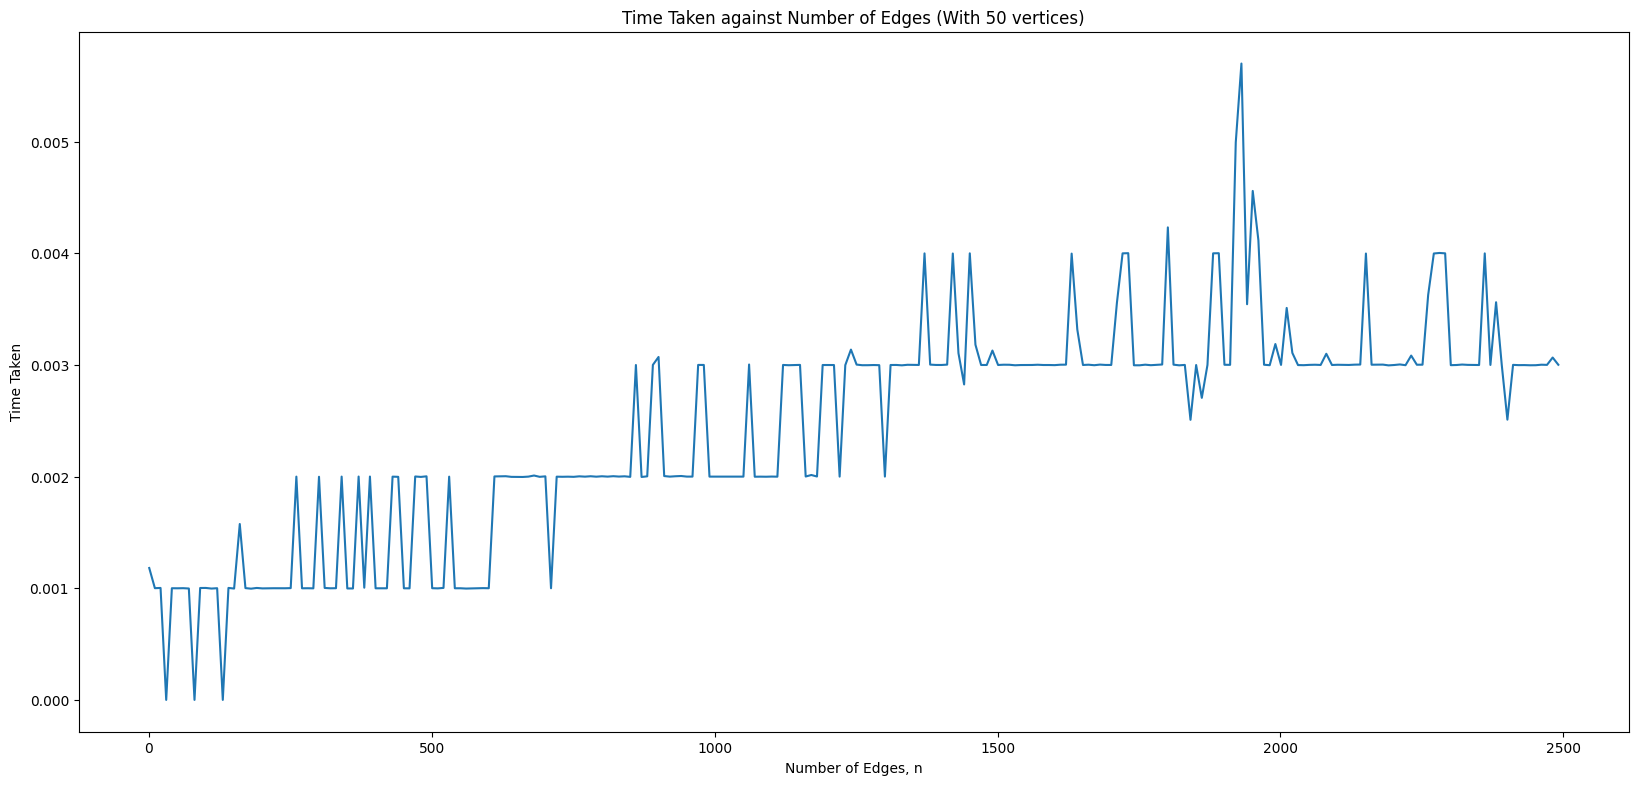

In [11]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sizes1, time_complexity1)
# ax.plot(sizes, theorectical_comparisons)
ax.set_xlabel("Number of Edges, n")
ax.set_ylabel("Time Taken")
ax.set_title("Time Taken against Number of Edges (With 50 vertices)")

# FIX E CHANGE V

In [13]:
if __name__ == "__main__":
    
    print("========== start ==========")
    
    random.seed(10)
    sizes2 = np.arange(1,50,1)
    time_complexity2 = []
    
    for size in sizes2:
        source = 1
        edges = 2500
        graph = generateGraph(size, edges)
        
        start_time = time.time()
        pi = dijkstra(graph, source)
        
        time_taken = (time.time() - start_time)
        time_complexity2.append(time_taken)
        print(time_taken)
    
    print("=========== end ===========")

========== start ==========
0.0
0.0
0.0
0.0
0.0
0.0009992122650146484
0.0
0.0
0.0
0.0
0.0010554790496826172
0.0
0.0
0.0
0.0
0.0009996891021728516
0.0
0.000997304916381836
0.0010008811950683594
0.0
0.0010123252868652344
0.0
0.0
0.0
0.0010008811950683594
0.00099945068359375
0.0009996891021728516
0.0010023117065429688
0.00099945068359375
0.00099945068359375
0.0009958744049072266
0.0019991397857666016
0.0019981861114501953
0.0010004043579101562
0.0009989738464355469
0.0019979476928710938
0.0010025501251220703
0.002000093460083008
0.002003192901611328
0.001999378204345703
0.0020041465759277344
0.0019991397857666016
0.0030028820037841797
0.0020020008087158203
0.002002239227294922
0.0019996166229248047
0.0030028820037841797
0.002998828887939453
0.0030012130737304688
=========== end ===========


Text(0.5, 1.0, 'Time Taken against Number of Vertices (With 2500 edges)')

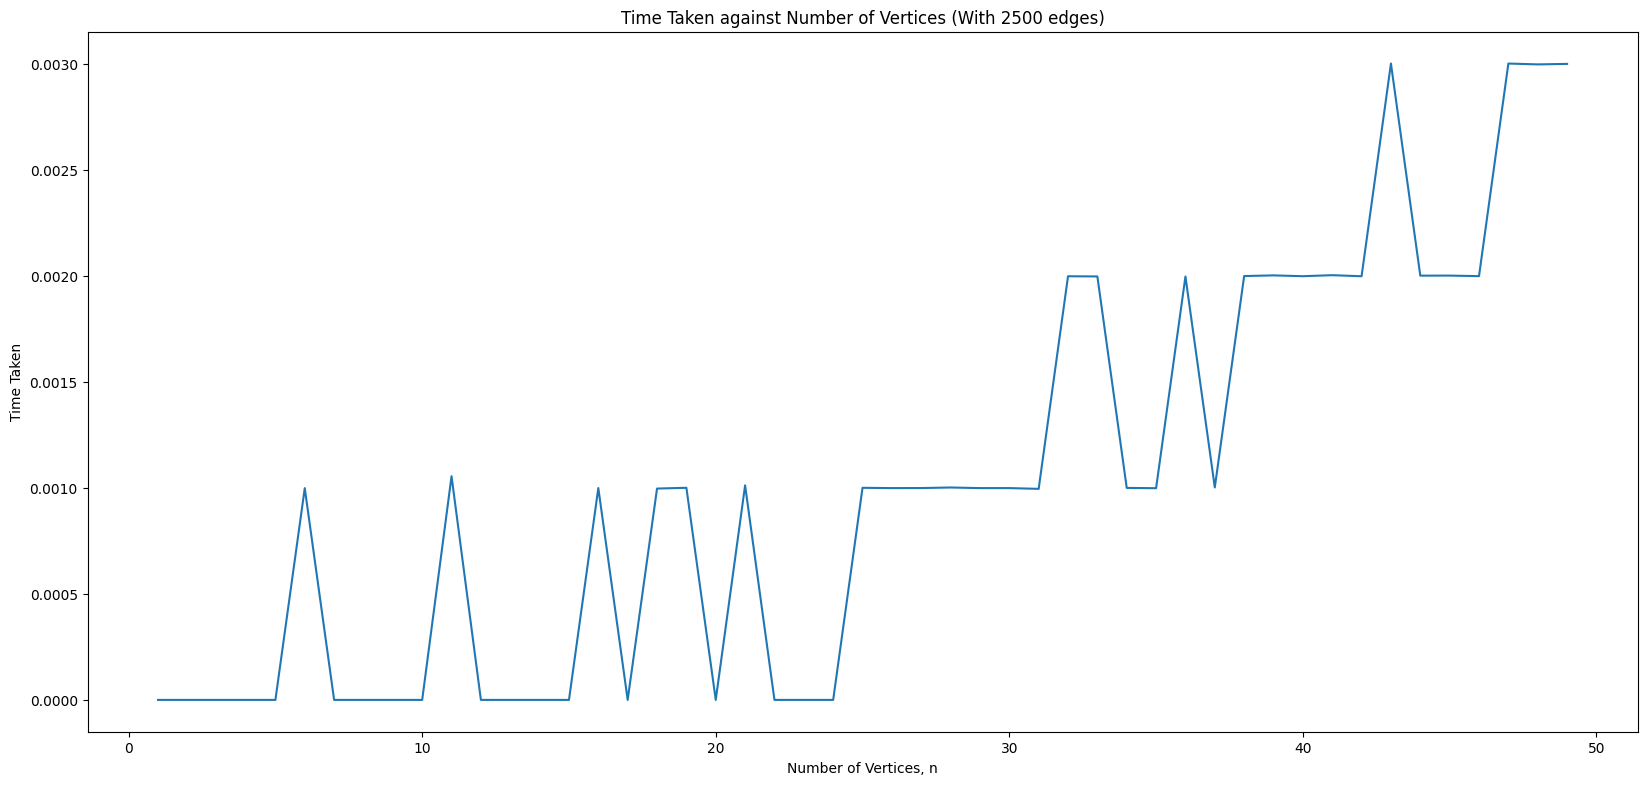

In [14]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot((sizes2), time_complexity2)
# ax.plot(sizes, theorectical_comparisons)
ax.set_xlabel("Number of Vertices, n")
ax.set_ylabel("Time Taken")
ax.set_title("Time Taken against Number of Vertices (With 2500 edges)")

# Question b

In [15]:
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
  
    # See if left child of root exists and is
    # greater than root
    if l < n and arr[i][1] < arr[l][1]:
        largest = l
  
    # See if right child of root exists and is
    # greater than root
    if r < n and arr[largest][1] < arr[r][1]:
        largest = r
  
    # Change root, if needed
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i]  # swap
  
        # Heapify the root.
        heapify(arr, n, largest)

In [16]:
def heapSort(arr):
    n = len(arr)
  
    # Build a maxheap.
    # Since last parent will be at ((n//2)-1) we can start at that location.
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
  
    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]   # swap
        heapify(arr, i, 0)

    return arr

In [18]:
def generateGraph1(num_of_vertices, num_of_edges):
    
    adj_list = {}
    
    edge_count = 0
    for i in range(1,num_of_vertices+1):
        node1 = i
#         adj_list[node1] = []
        for j in range(i+1,num_of_vertices+1):
            temp1 = []
            temp2 = []
            node2 = j
            edge_exist = random.randint(0,3)
            if edge_exist > 0 and i != j and edge_count != num_of_edges:
                e1 = []
                e2 = []
                edge_count += 1
                dist = random.randint(1,10)
                if node1 not in adj_list and node2 not in adj_list:
                    e1.append(node2)
                    e1.append(dist)
                    temp1.append(e1)
                    adj_list[node1] = temp1
                    
                    e2.append(node1)
                    e2.append(dist)
                    temp2.append(e2)
                    adj_list[node2] = temp2 
                elif node1 in adj_list and node2 not in adj_list:
                    temp1.extend(adj_list[node1])
                    e1.append(node2)
                    e1.append(dist)
                    temp1.append(e1)
                    adj_list[node1] = temp1

                    e2.append(node1)
                    e2.append(dist)
                    temp2.append(e2)
                    adj_list[node2] = temp2 
                elif node1 not in adj_list and node2 in adj_list:
                    e1.append(node2)
                    e1.append(dist)
                    temp1.append(e1)
                    adj_list[node1] = temp1

                    temp2.extend(adj_list[node2])
                    e2.append(node1)
                    e2.append(dist)
                    temp2.append(e2)
                    adj_list[node2] = temp2 
                else:
                    temp1.extend(adj_list[node1])
                    e1.append(node2)
                    e1.append(dist)
                    temp1.append(e1)
                    adj_list[node1] = temp1

                    temp2.extend(adj_list[node2])
                    e2.append(node1)
                    e2.append(dist)
                    temp2.append(e2)
                    adj_list[node2] = temp2 
            
        
        if node1 not in adj_list:
            adj_list[node1] = 0
        
    return adj_list
############# TEST #############
random.seed(10)
print(generateGraph1(5, 10))

{1: [[3, 8], [5, 8]], 3: [[1, 8], [2, 5], [5, 6]], 5: [[1, 8], [2, 6], [3, 6]], 2: [[3, 5], [4, 1], [5, 6]], 4: [[2, 1]]}


In [19]:
def adjacent1(adjacencyList, vertice):
    
    adjacents = []
    
    value = adjacencyList[vertice]

    if not value:
        return 0
    else:
        for each in value:
            adjacents.append(each[0])
    
        return adjacents

############# TEST #############
random.seed(10)
adjacencyList = generateGraph1(10,10)
print("adjacencyList")
print(adjacencyList)
vertice = 4
print("adjacents to vertice", vertice)
print(adjacent1(adjacencyList, vertice))

adjacencyList
{1: [[3, 8], [5, 8], [6, 5], [7, 1], [8, 6], [10, 6]], 3: [[1, 8]], 5: [[1, 8], [2, 7]], 6: [[1, 5], [2, 5]], 7: [[1, 1], [2, 8]], 8: [[1, 6]], 10: [[1, 6]], 2: [[4, 3], [5, 7], [6, 5], [7, 8]], 4: [[2, 3]], 9: 0}
adjacents to vertice 4
[2]


In [20]:
def distance(adjacencyList, v, u):
    
    value = adjacencyList[v]
    
    i = 0
    for each in value:
        vertice = each[0]
        dist = each[1]
        if vertice == u:
            return dist
        i += 1
        
############# TEST #############
random.seed(10)
adjacencyList = generateGraph1(5,10)
print("adjacencyList")
print(adjacencyList)
v = 1
u = 3
print("distance between", v, "and", u)
print(distance(adjacencyList, v, u))

adjacencyList
{1: [[3, 8], [5, 8]], 3: [[1, 8], [2, 5], [5, 6]], 5: [[1, 8], [2, 6], [3, 6]], 2: [[3, 5], [4, 1], [5, 6]], 4: [[2, 1]]}
distance between 1 and 3
8


In [21]:
def dijkstra1(adj_list, source):
    
    v = len(adj_list)
    dist_from_source = np.ones(v) * np.inf
    pi = np.zeros(v).astype(int)
    S = np.zeros(v).astype(int)
    
    dist_from_source[source - 1] = 0
    Q = priorityQueue(dist_from_source)
    
    while(len(Q) != 0):

        u = extractCheapest(Q)
        S[u - 1] = 1
        
        adjacents = adjacent1(adj_list, u)
        
        if adjacents != 0: 
            for v in adjacents:
                if S[v - 1] != 1 and (dist_from_source[v - 1] > (dist_from_source[u - 1] + distance(adj_list, u, v))):
                    remove(Q, v)
                    dist_from_source[v - 1] = dist_from_source[u - 1] + distance(adj_list, u, v)
                    pi[v - 1] = u
                    insert(Q, v, dist_from_source[v-1])
        
    return pi

############# TEST #############
random.seed(10)
g = generateGraph1(10,10)
print("adjacencyList")
print(g)
s = 1
y = dijkstra1(g, s)
print("predecessors")
print(y)

adjacencyList
{1: [[3, 8], [5, 8], [6, 5], [7, 1], [8, 6], [10, 6]], 3: [[1, 8]], 5: [[1, 8], [2, 7]], 6: [[1, 5], [2, 5]], 7: [[1, 1], [2, 8]], 8: [[1, 6]], 10: [[1, 6]], 2: [[4, 3], [5, 7], [6, 5], [7, 8]], 4: [[2, 3]], 9: 0}
predecessors
[0 7 1 2 1 1 1 1 0 1]


# FIX V CHANGE E

In [22]:
if __name__ == "__main__":
    
    print("========== start ==========")
    
    random.seed(10)
    sizes3 = np.arange(1,2500,10)
    time_complexity3 = []
    
    for size in sizes3:
        source = 1
        vertices = 50
        graph = generateGraph1(vertices, size)
        
        start_time = time.time()
        pi = dijkstra1(graph, source)
        
        time_taken = (time.time() - start_time)
        time_complexity3.append(time_taken)
        print(time_taken)
    
    print("=========== end ===========")

========== start ==========
0.0
0.0
0.0
0.0
0.0
0.0
0.0010008811950683594
0.001001596450805664
0.0009999275207519531
0.0010714530944824219
0.0
0.0010042190551757812
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0009992122650146484
0.0009982585906982422
0.0
0.0
0.0009982585906982422
0.001001119613647461
0.0
0.0
0.0010018348693847656
0.0
0.0
0.001001596450805664
0.00099945068359375
0.0010042190551757812
0.0
0.000997304916381836
0.0
0.001001119613647461
0.0009996891021728516
0.00099945068359375
0.0
0.0010001659393310547
0.0010030269622802734
0.00099945068359375
0.0
0.001004934310913086
0.0
0.0009996891021728516
0.0009999275207519531
0.0009999275207519531
0.0009996891021728516
0.0009984970092773438
0.0009999275207519531
0.0010001659393310547
0.001001119613647461
0.0010004043579101562
0.0009965896606445312
0.0009989738464355469
0.0010027885437011719
0.0010023117065429688
0.0020041465759277344
0.0009987354278564453
0.0010004043579101562
0.0010001659393310547
0.00099945068359375
0.001001596450805664
0.000998

Text(0.5, 1.0, 'Time Taken against Number of Edges (With 50 vertices)')

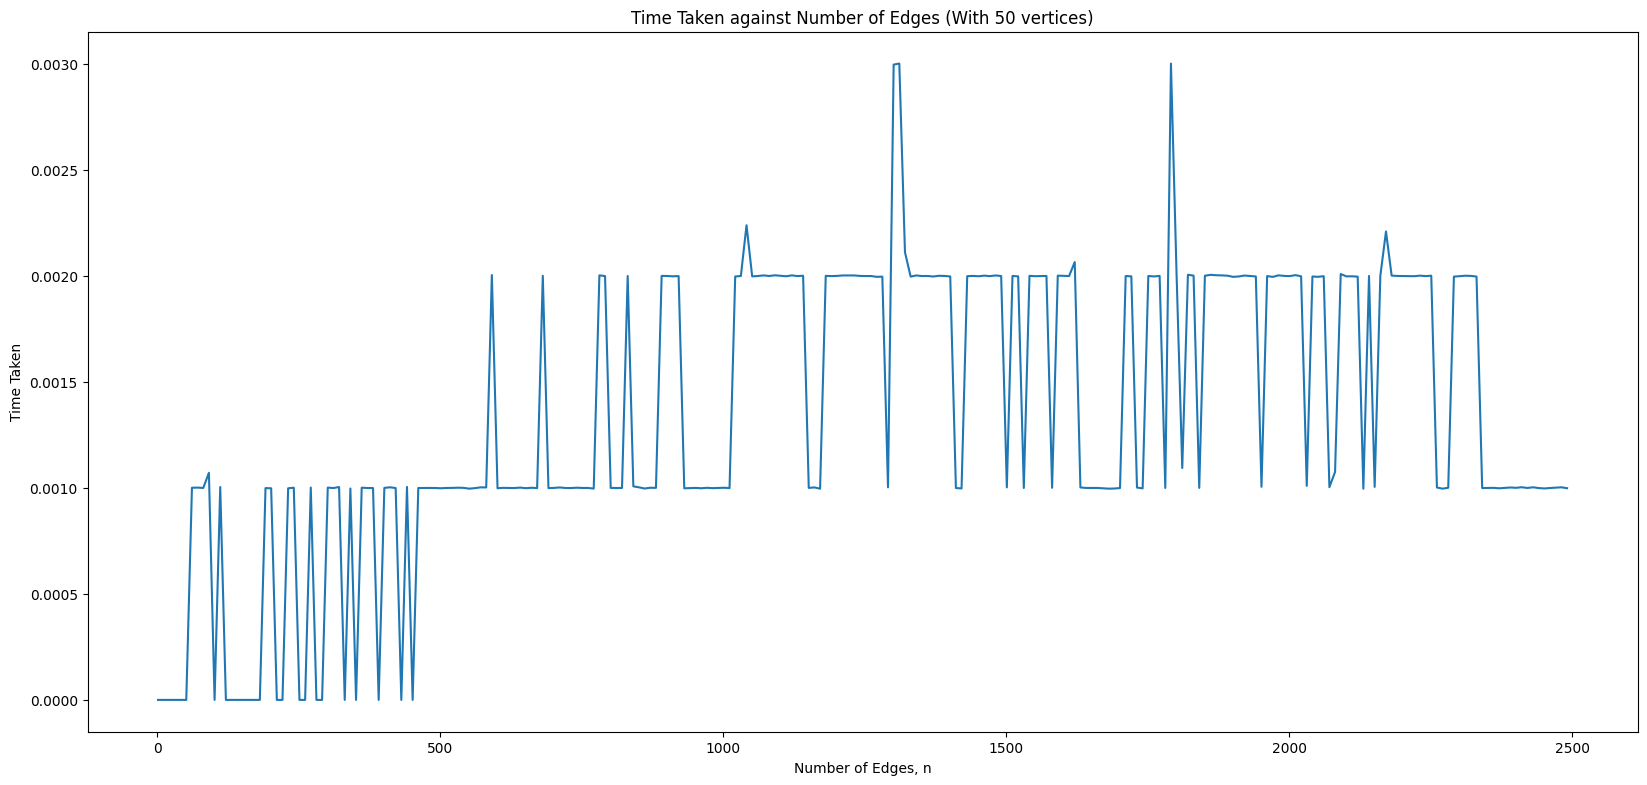

In [23]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sizes3, time_complexity3)
# ax.plot(sizes, theorectical_comparisons)
ax.set_xlabel("Number of Edges, n")
ax.set_ylabel("Time Taken")
ax.set_title("Time Taken against Number of Edges (With 50 vertices)")

# FIX E CHANGE V

In [24]:
if __name__ == "__main__":
    
    print("========== start ==========")
    
    random.seed(10)
    sizes4 = np.arange(1,50,1)
    time_complexity4 = []
    
    for size in sizes4:
        source = 1
        edges = 2500
        graph = generateGraph1(size, edges)
        
        start_time = time.time()
        pi = dijkstra1(graph, source)
        
        time_taken = (time.time() - start_time)
        time_complexity4.append(time_taken)
        print(time_taken)
    
    print("=========== end ===========")

========== start ==========
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0010004043579101562
0.0
0.0
0.0
0.0
0.0
0.0010025501251220703
0.0
0.0
0.0009982585906982422
0.0
0.0009987354278564453
0.0
0.0
0.0
0.0
0.0
0.001005411148071289
0.0009953975677490234
0.0
0.0
0.0010018348693847656
0.0
0.0009946823120117188
0.00099945068359375
0.0010025501251220703
0.0
0.0010380744934082031
0.000997781753540039
0.001997232437133789
0.0010025501251220703
0.0010023117065429688
0.002001047134399414
0.0010025501251220703
0.0019981861114501953
0.001997232437133789
=========== end ===========


Text(0.5, 1.0, 'Time Taken against Number of Vertices (With 2500 edges)')

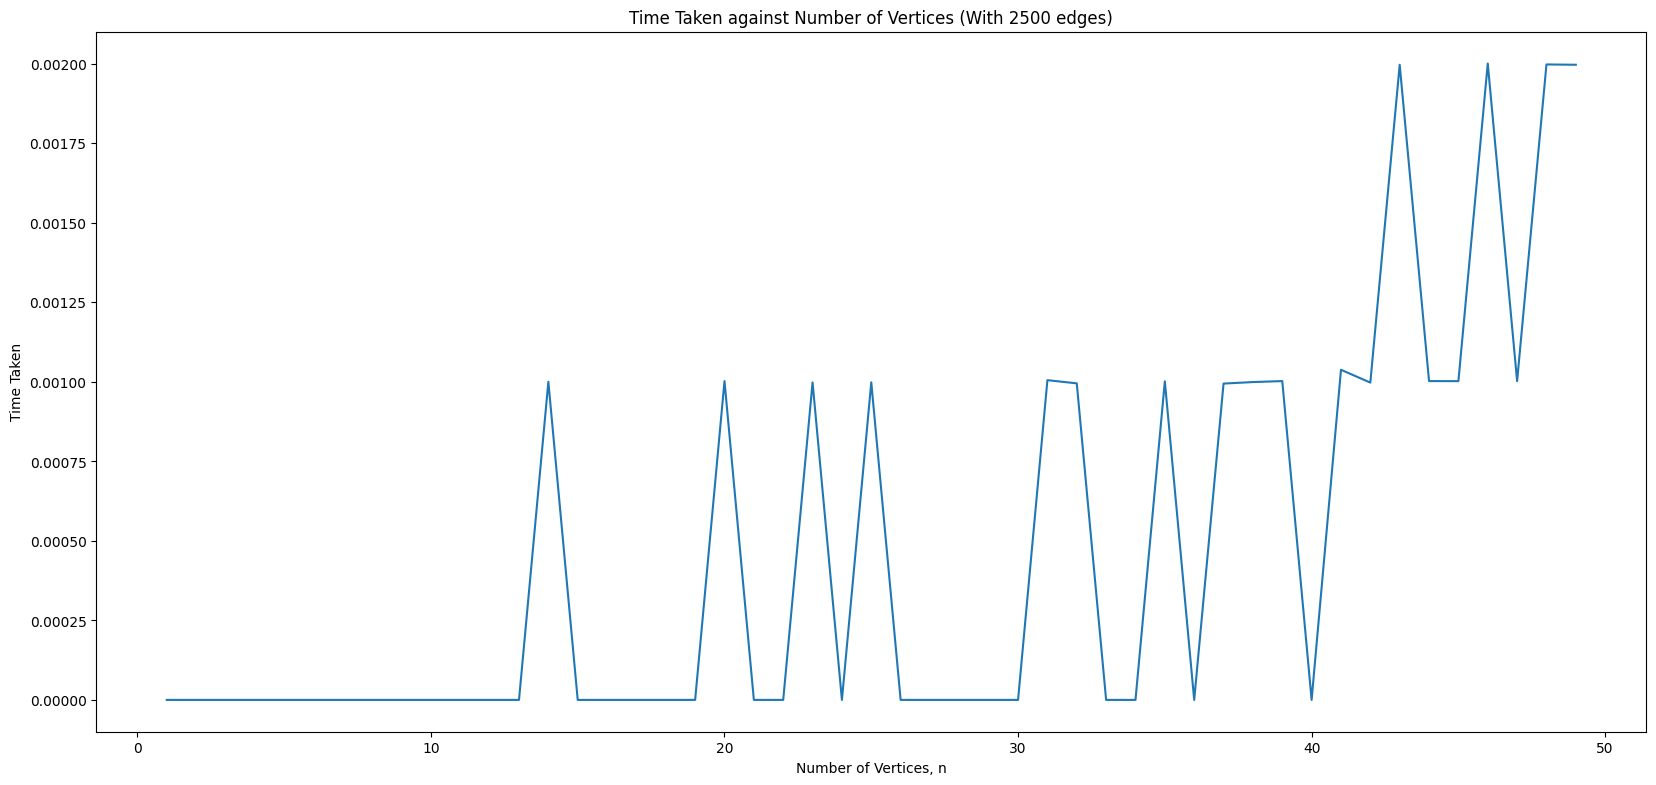

In [25]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sizes4, time_complexity4)
# ax.plot(sizes, theorectical_comparisons)
ax.set_xlabel("Number of Vertices, n")
ax.set_ylabel("Time Taken")
ax.set_title("Time Taken against Number of Vertices (With 2500 edges)")